In [1]:
# necessary imports
import sys
import pandas as pd
import dvc.api
import warnings
warnings.filterwarnings('ignore')

In [2]:
# adding and setting up helper scripts
sys.path.insert(1, './../scripts/')
import defaults as defs
import dataCleaner as dc
import dataVisualizer as dv

cleaner = dc.dataCleaner('EDA notebook')
visualizer = dv.dataVisualizer('EDA notebook')

--> <Logger dataCleaner (WARNING)>
logger <Logger dataCleaner (DEBUG)> created at path: ../logs/cleaner_root.log
Data cleaner in action
--> <Logger dataVisualizer (WARNING)>
logger <Logger dataVisualizer (DEBUG)> created at path: ../logs/visualizer_root.log
Data visualizer in action


In [3]:
# version of the data
# v1: raw-data
version= 'v1'

# set up the data url
data1= dvc.api.get_url(path= defs.data1,         	 # path to the data file
		               repo= defs.repo_for_nb,       # path to the repository
		               rev= version)                 # version of the data

data2= dvc.api.get_url(path= defs.data2,         	 # path to the data file
		               repo= defs.repo_for_nb,       # path to the repository
		               rev= version)                 # version of the data

In [4]:
# print the data path
print(f'data path(s):\n{data1}\n{data2}')

data path(s):
/home/f0x-tr0t/Documents/10X//dc/31a6d9ca5315cecd1bf0cfee00a7e0
/home/f0x-tr0t/Documents/10X//10/02707afa69972e511a60575fbc6293


Storing the data locally

In [5]:
date = ['Trip Start Time', 'Trip End Time'] # the date column name
missing_values = ["n/a", "na", "undefined", '?', 'NA', 'undefined']

# read CSV 
df1 = pd.read_csv(data1, na_values=missing_values, parse_dates=date)
df2 = pd.read_csv(data2, na_values=missing_values)

# Data preparation, EDA, and feature Engineering

We are going to take an in depth look at the data sets provided by [Gokada](https://www.gokada.ng/)

But first lets make some Data preparation, then we will take a further in depth look at EDA, and finally feature engineering 

## Data preparation

### Setting up the first data frame
### Trips

In [6]:
df1[:7]

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
5,392005,"6.565087699999999,3.3844415","6.499696300000001,3.3509075",2021-07-01 10:53:36,2021-07-01 11:27:51
6,392009,"6.6636484,3.3082058","6.6185421,3.301634",2021-07-01 06:39:51,2021-07-01 07:41:12


Sample data from the first data frame

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Trip ID           536020 non-null  int64         
 1   Trip Origin       536020 non-null  object        
 2   Trip Destination  536020 non-null  object        
 3   Trip Start Time   534369 non-null  datetime64[ns]
 4   Trip End Time     536019 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 20.4+ MB


We have five features in the firs data set, all telling us about the trip and its several attributes

In [8]:
df1.describe()

,Trip ID
count,5.360200e+05
mean,9.910221e+05
std,3.456364e+05
min,3.919960e+05
25%,6.935610e+05
50%,9.910085e+05
75%,1.281570e+06
max,1.637709e+06


As we can see only the trip id has numeric values, all data values will be changed to their appropriate data types

Trip Destination and Trip Origin

In [9]:
df1['Trip ID'].min(), df1['Trip ID'].max()

(391996, 1637709)

the trip Id's are between 391, 996 and 1, 637, 709

This indicates at least to some degree not all of the data was provided at this point in time

In [23]:
df1['Trip ID'].value_counts()

391996     1
1180070    1
1180061    1
1180060    1
1180059    1
          ..
789757     1
789755     1
789751     1
789750     1
1637709    1
Name: Trip ID, Length: 536020, dtype: int64

All trip id's are unique

### Setting up the second data frame
### Deliveries

In [11]:
df2[:7]

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
5,6,392001,245662,rejected,6.593095,3.287759,NaN,NaN
6,7,392001,171651,rejected,6.613538,3.270779,NaN,NaN


Sample data from the second data frame

In [31]:
df2 = cleaner.remove_unwanted_cols(df2, ['created_at', 'updated_at'])

feature: created_at removed successfully
feature: updated_at removed successfully


Since the two features were complexly empty, they are dropped

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 71.3+ MB


We have 6 features, each explaining about a specific delivery attributes

In [12]:
df2.driver_action.value_counts()

rejected    1531837
accepted      25903
Name: driver_action, dtype: int64

There are basically two driver actions in the data set

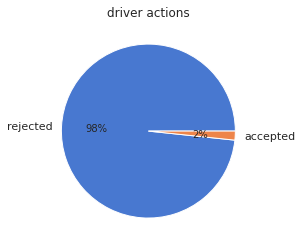

In [29]:
visualizer.plot_pie(df=df2, column='driver_action', title='driver actions')

This says a lot already. Out of the 1, 557, 740 delivery actions recorded only 25, 903 (~2%) accepted the delivery and went through

The rest ~98% accepted the delivery but the delivery was not successful

More investigation is required on this

In [35]:
df2.order_id.value_counts()

401129    4122
401849    3360
415800    2922
418106    2617
405195    2129
          ... 
427525       1
427528       1
427537       1
427549       1
418710       1
Name: order_id, Length: 26492, dtype: int64

In [14]:
df2.order_id.min(), df2.order_id.max()

(392001, 517948)

There are almost around 26, 500 order id's in this data set

392, 001 being the minimum and 517, 948 being the maximum

In [16]:
len(df2.order_id.value_counts().unique())

707

Out of the recorded 26, 500 order id's only 707 of them are unique

<AxesSubplot:>

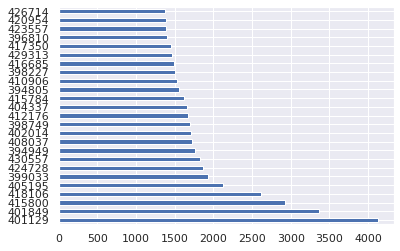

In [17]:
df2.order_id.value_counts()[:25].plot(kind='barh')

In [18]:
df2.order_id.value_counts()[:15]

401129    4122
401849    3360
415800    2922
418106    2617
405195    2129
399033    1929
424728    1861
430557    1833
394949    1766
408037    1720
402014    1713
398749    1698
412176    1673
404337    1661
415784    1614
Name: order_id, dtype: int64

In [19]:
df2.driver_id.min(), df2.driver_id.max(), 

(121981, 247877)

In [20]:
df2.driver_id.value_counts()

245538    6941
243020    6447
242971    6258
243676    5884
243932    5793
          ... 
245840       1
247182       1
245907       1
246082       1
246602       1
Name: driver_id, Length: 1213, dtype: int64

In [21]:
df2.driver_id.value_counts().keys().unique()

Int64Index([245538, 243020, 242971, 243676, 243932, 171165, 243581, 244121,
            244031, 243826,
            ...
            247709, 246615, 245756, 247508, 247794, 245840, 247182, 245907,
            246082, 246602],
           dtype='int64', length=1213)

<AxesSubplot:>

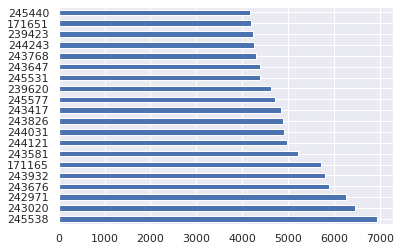

In [22]:
df2.driver_id.value_counts()[:20].plot(kind='barh')